## Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

## Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target 

## Fit KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

e:\anaconda\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [3]:
## Get cluster labels for each data point
cluster_labels = kmeans.labels_

## Combine with original data
df = pd.DataFrame(X, columns=iris.feature_names)
df['cluster'] = cluster_labels
df['species'] = iris.target  # true labels for comparison

## Interactive 3D plot
import plotly.express as px

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

fig = px.scatter_3d(
    df,
    x=iris.feature_names[0],  # Sepal length
    y=iris.feature_names[1],  # Sepal width
    z=iris.feature_names[2],  # Petal length
    color='cluster',          # K-Means cluster
    symbol='species',         # True species
    title='Iris Clusters in 3D (K-Means)',
    opacity=0.7,
    color_discrete_sequence=colors
)

fig.update_traces(marker=dict(symbol='circle', size=6))
fig.show()

e:\anaconda\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

e:\anaconda\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

e:\anaconda\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

e:\anaconda\envs\mldp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

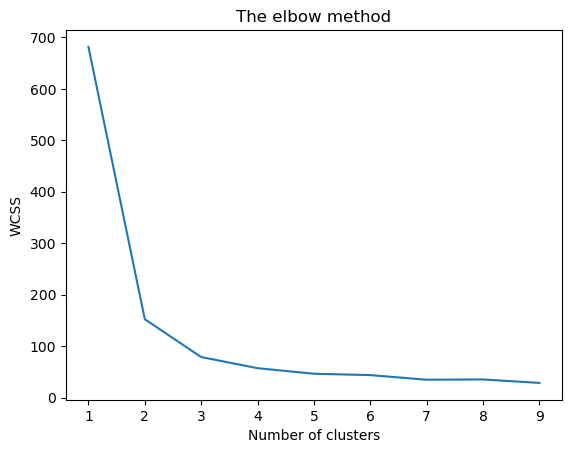

In [4]:
## Elbow method to find optimal number of clusters
WCSS = []

for clusters in range(1,10):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,10), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## PCA

In [8]:
from sklearn.decomposition import PCA

# Apply PCA (reduce to 3 components for 3D plot)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create DataFrame for plotting
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df['cluster'] = cluster_labels

# Custom colors for distinct clusters
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot in 3D using Plotly
fig = px.scatter_3d(
    df,
    x='PC1', y='PC2', z='PC3',
    color='cluster',
    title='Iris Clusters in PCA Space (3D)',
    opacity=0.8,
    color_discrete_sequence=colors
)

fig.update_traces(marker=dict(symbol='circle', size=6))
fig.show()